<a href="https://colab.research.google.com/github/nithuthyagu/nithuthyagu/blob/main/711_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  2 07:37:52 2022

@author: nithya.thyagarajan
"""

import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import xlrd
import glob
import os
import pkg_resources
import warnings

sns.set()


In [2]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", 100)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 3000)

import seaborn as sns
%matplotlib inline

In [7]:
path = "/content/drive/MyDrive/DataChallenge/data_analysis_challenge_data.csv"

data = pd.read_csv(path)
print(data.shape)

(26985, 9)


Dataset has 9 columns and 26985 rows

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.9+ MB


#First look at the dataset -my understanding and assumptions
---> There are 5 numerical columns and 4 object columns
Object cols
_____________
 * Column - MONTH denotes the month of sale
 * Column - STORECODE denotes the store of sale
 * Column - GRP denotes the category of the object sold
 * Column - BILL_ID denotes the transaction_id of the sale
Numeric cols
_____________
 
*   Column - DAY denotes the day of the month of sale
*   Column - BILL_AMT denotes the final sale amount 
*   Column - QTY denotes the quantity of product of sale
*   Column - VALUE denotes the value of the sale [Qty*Price]
*   Column - PRICE denotes the per unit price of the product of sale



In [9]:
print(data.head())
#print(data.describe(include="all").T)
print(data.describe().T)
print(data.nunique())


  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP  
0     BUTTER MARGR  (4/94)  
1  CONFECTIONERY - ECLAIRS  
2                CHOCOLATE  
3             PACKAGED TEA  
4         ALL IODISED SALT  
            count        mean         std  min   25%    50%    75%      max
DAY       26985.0   15.167019    8.956057  1.0   7.0   14.0   23.0     31.0
BILL_AMT  26985.0  278.754206  541.398504  0.0  40.0  111.0  280.0   7292.0
QTY       26985.0    4.105021   95.666947  0.5   1.0    1.0    2.0  12000.0
VALUE     26985.0   67.808551  118.005978  0.0  10.0   30.0   80.0   3150.0
PRICE     26985.0   52.812982   84.987730  0.0  10.0   22.0   64.0 

#Statistical observations of the numerical cols
* there are no missing values
* mean and median seems to be far, data is not normally distributed and are skewed
* Transactions are found on all days of the month looking at the min, max and 50%
* 3 months data is available
* there are 6424 unique transactions
* there are 80 categories of products
* transactions of 10 stores are available
* Data looks good, doesn't need much a cleaning or pre processing

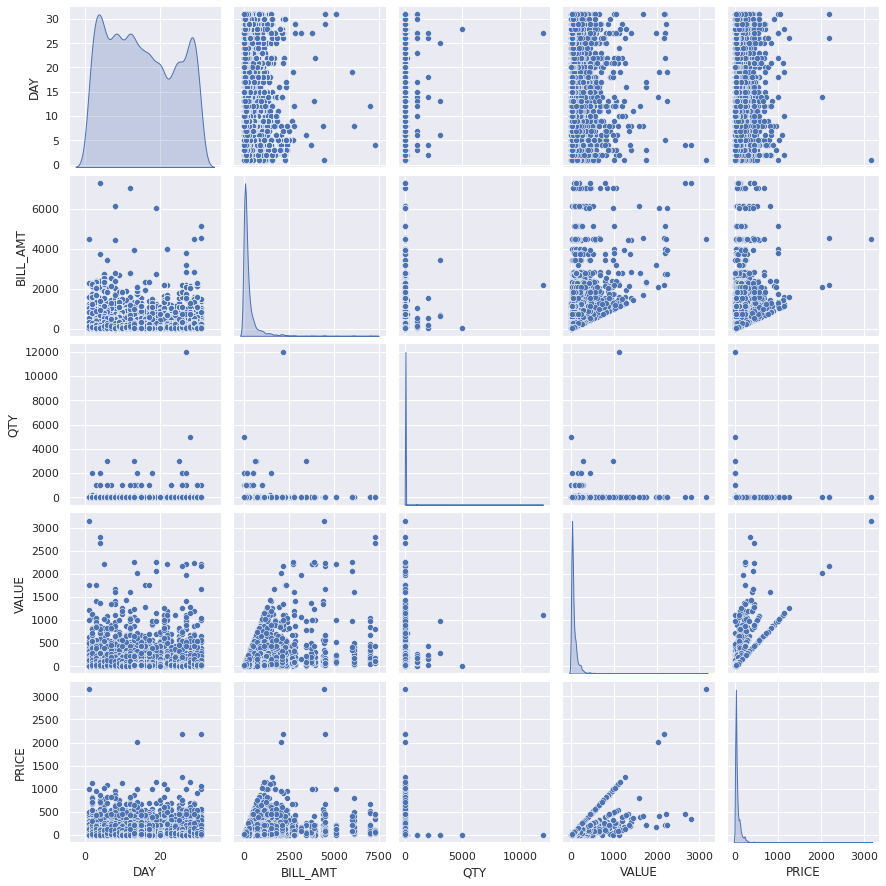

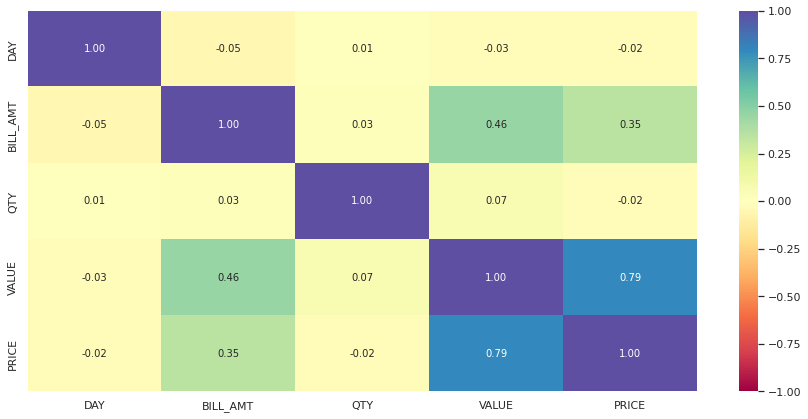

In [10]:
sns.pairplot(data, diag_kind = 'kde')

plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#Relationship between PRICE, VALUE, BILL_AMT, QTY
* Based on the pair plot -> as the Value increases the price amount is seen to increase
* As the value increases, Bill amount also increases
* VALUE AND PRICE are highly correlated based on the heat map as well
* BILL_AMT, PRICE and VALUE are less than 0.49 correlated
* Qty - there seem to be some outliers [12000] so the correlation does not seem very well
* An assumption can be made here and this outlier could be deleted but its not done. This need to be vetted with the SME or Business
* and necessary steps need to be taken for the outlier


             DAY    BILL_AMT      QTY      VALUE      PRICE  Total_Store_Sales
STORECODE                                                                     
N1         68255   626464.78  40519.0  144206.93  119254.40          144093.93
N10        34686   550107.00   3588.0  142433.00  115325.00          142433.00
N2         19233   794062.00  23788.0  221355.00  148303.10          221373.00
N3         28933   494536.37   2877.0  125528.79  102414.79          125528.79
N4         43747   872215.70   7908.0  206874.99  155969.23          206874.99
N5         68476   695755.00   7142.0  238057.00  207912.00          238057.00
N6         17726   366530.00   1934.0  110187.00   91198.00          110187.00
N7         90186  1036821.74  17897.0  273787.15  228852.28          273784.15
N8         17315   492817.35   2508.0  116466.86   78686.52          116466.86
N9         20725  1592872.31   2613.0  250917.03  177243.01          250917.03


Text(0, 0.5, 'Bill_Amt')

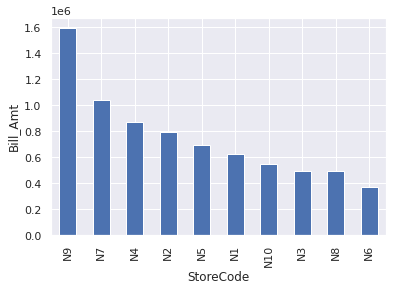

In [46]:
#Techincal Analysis

# Sales by store

data['Total_Store_Sales'] = data['QTY']*data['PRICE']

print(data.groupby('STORECODE').sum())

# Looks like BILL_AMT varies from Total_Store_Sales amount calculated using the QYT and PRICE per unit.
# This need to be clarified, for simplicity, I am using BILL_AMT as the total_sales amount in this exercise

Q1_Result = data.groupby('STORECODE')['BILL_AMT'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
Q1_Result.set_xlabel("StoreCode")
Q1_Result.set_ylabel("Bill_Amt")




Sales by store – Calculate the total sales amount made by each store over the entire
three months and visualize with a plot of your choice.

In [47]:
# Formatting but this is not in the graph

Store_Sales = data.groupby('STORECODE')['BILL_AMT'].sum().sort_values(ascending=False).head(10)
Store_Sales = Store_Sales.reset_index()

#Generating the labels which will show the sales value in K figure
Store_Sales['Total_Bill_Amount'] = ['$ '+str(round(int(v)/1000))+' K' for v in Store_Sales.BILL_AMT]
print(Store_Sales)

  STORECODE    BILL_AMT Total_Bill_Amount
0        N9  1592872.31          $ 1593 K
1        N7  1036821.74          $ 1037 K
2        N4   872215.70           $ 872 K
3        N2   794062.00           $ 794 K
4        N5   695755.00           $ 696 K
5        N1   626464.78           $ 626 K
6       N10   550107.00           $ 550 K
7        N3   494536.37           $ 495 K
8        N8   492817.35           $ 493 K
9        N6   366530.00           $ 367 K


Sales by category – For each store, find the category of products that’s sold the most
(qty) and visualize with a plot of your choice.

In [41]:
Store_Sales_Category = data.groupby(["STORECODE","GRP"])['BILL_AMT'].sum().sort_values(ascending=False).head(10)
print(Store_Sales_Category)

Q2_Result = data.groupby(["STORECODE","GRP"])['BILL_AMT'].sum().sort_values(ascending=False).head(10)


STORECODE  GRP                       
N5         BISCUITS - CORE & NON CORE    182817.00
N1         BISCUITS - CORE & NON CORE    176825.99
N9         SPICES (03/04)                174324.02
N4         BISCUITS - CORE & NON CORE    160441.12
N7         BISCUITS - CORE & NON CORE    136739.99
N2         BISCUITS - CORE & NON CORE    126635.00
N9         WASHING POWDERS/LIQUIDS       113529.04
N4         WASHING POWDERS/LIQUIDS       113293.53
N2         PACKAGED TEA                  107223.00
N10        BISCUITS - CORE & NON CORE    106673.00
Name: BILL_AMT, dtype: float64


Text(0, 0.5, 'Bill_Amt')

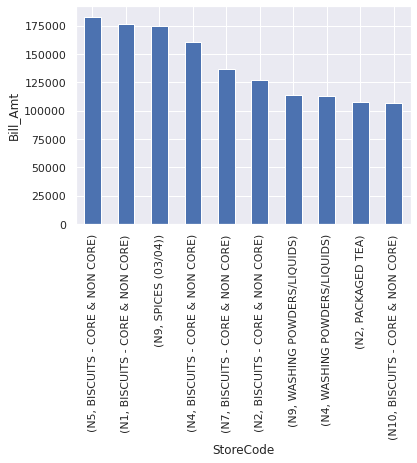

In [42]:
Q2_Result = data.groupby(["STORECODE","GRP"])['BILL_AMT'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
Q2_Result.set_xlabel("StoreCode")
Q2_Result.set_ylabel("Bill_Amt")

Sales by day – For each store, find the day across all three months where the total sales
amount is the highest. In other words, find the best day for each store in terms of sales
amount and visualize with a plot of your choice.

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Bill_Amt')

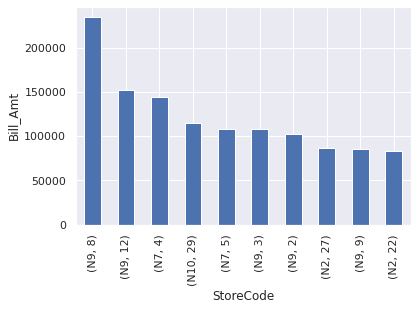

In [50]:
Q3_Result = data.groupby(["STORECODE","DAY"])['BILL_AMT'].sum().sort_values(ascending=False).head(10).plot(kind='bar')


Q3_Result.set_xlabel("StoreCode")
Q3_Result.set_ylabel("Bill_Amt")


In [52]:
print(data.groupby(["STORECODE","DAY"])['BILL_AMT'].sum().sort_values(ascending=False).head(10))

STORECODE  DAY
N9         8      234615.25
           12     152433.00
N7         4      144930.69
N10        29     114749.00
N7         5      108709.85
N9         3      107699.00
           2      102562.00
N2         27      86952.00
N9         9       85655.00
N2         22      83004.00
Name: BILL_AMT, dtype: float64


1. Sales by month – Calculate total sales amount across all stores per month to find the
best month across the given three months and visualize with a plot of your choice.

Text(0, 0.5, 'Bill_Amt')

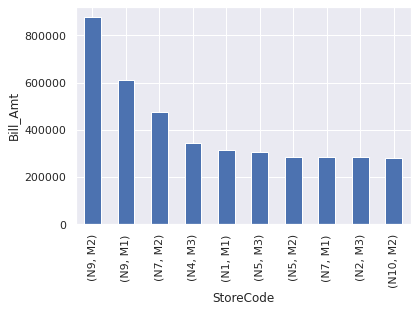

In [48]:
QBonus_Result = data.groupby(["STORECODE","MONTH"])['BILL_AMT'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
QBonus_Result.set_xlabel("StoreCode")
QBonus_Result.set_ylabel("Bill_Amt")

Conclusions and Insights
* Store N9 shows the highest Total_Sales (based on the assumption stated above,BILL_AMT is summed as Total_Sales) which is 1.59M USD
* Store N5 shows the highest total_Sales by Category. Biscuits, Core and Non Core category has sold the most in this store with a total_Sales of 182k USD
* Store N9 has the highest sale in a day on the 9th day of the month. This also has the second highest sale of the day on the 12th. Its top day sale is 234k USD
* Store N9 has the maximum sale on the second month.

